# Proyek Analisis Data: [Bike Sharing]
- **Nama:** [Novia Ayu Fitriana]
- **Email:** [a524xam376@devacademy.id]
- **ID Dicoding:** [A524XAM376]

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana kondisi suhu, kelembaban, dan cuaca mempengaruhi jumlah penyewa harian?
- Pertanyaan 2: Bagaimana pola jumlah penyewa berubah sepanjang hari, dan faktor apa yang mungkin memengaruhi peningkatan atau penurunan jumlah penyewa pada jam-jam tertentu?

## Import Semua Packages/Library yang Digunakan

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [22]:
import pandas as pd

df1 = pd.read_csv("/content/hour.csv")

# menampilkan 5 baris teratas dari setiap dataset
print("Dataset 1:")
display(df1.head())

Dataset 1:


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset berhasil diunggah dalam Google Colab.
- Dataset berisi informasi harian dan perjam yang memiliki kolom suhu, kelembapan, cuaca, dan jumlah pengguna terdaftar.

### Assessing Data

In [23]:
# Memeriksa struktur data
print("Informasi Dataset 1:")
display(df1.info())

Informasi Dataset 1:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


None

In [24]:
# Memeriksa statistik deskriptif
display(df1.describe())

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [25]:
# Memeriksa nilai yang hilang
print("Cek nilai yang hilang pada Dataset 1:")
display(df1.isnull().sum())

Cek nilai yang hilang pada Dataset 1:


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [26]:
# memeriksa nilai yang hilang beserta tipe data

# cek dataset
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


In [27]:
# Memeriksa data duplikat
print("Jumlah data duplikat pada Dataset 1:", df1.duplicated().sum())

Jumlah data duplikat pada Dataset 1: 0


**Insight:**
- Tidak ada nilai yang hilang pada dua Dataset
- Tipe data pada masing-masing kolong telah sesuai
- Tidak terdapat data duplikat pada kedua Dataset
- Dari statistik deskriftif dapat disimpulkan bahwa lebih banyak yang di ambil pada hari kerja dibandingkan hari libur.
- Suhu dan kelembapan menjadi faktor yang memengaruhi penyewaan sepeda


### Cleaning Data

In [28]:
# Menghapus data duplikasi
df1.drop_duplicates(inplace=True)

In [29]:
# Mengisi nilai yang hilang dengan data sebelumnya
df1.ffill(inplace=True)

In [30]:
# Menampilkan DataFrame untuk memastikan perubahan
display(df1.head())

# Menampilkan bentuk jika ada kolom yang dihapus
print("Bentuk Dataset 1:", df1.shape)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Bentuk Dataset 1: (17379, 17)


In [31]:
# Mapping nilai 'weathersit' menjadi deskripsi yang lebih jelas
weather_mapping = {
    1: 'Cerah / Berawan Tipis',
    2: 'Berkabut / Berawan',
    3: 'Salju Ringan / Hujan Ringan',
    4: 'Hujan Lebat / Kabut Salju'
}
df1['weather_desc'] = df1['weathersit'].map(weather_mapping)

# Mapping nilai 'season'
season_mapping = {
      1: 'Musim Semi',
      2: 'Musim Panas',
      3: 'Musim Gugur',
      4: 'Musim Dingin'
}

**Insight:**
- Tidak ditemukan data duplikat
- Tidak ada nilai yang di ganti karna tidak terdapat nilai yang hilang

## Exploratory Data Analysis (EDA)

### Explore ...

In [32]:
# Pengelompokan berdasarkan Season (Musim)
aggregated_season = df1.groupby('season', observed=True).agg({'cnt': ['max', 'min', 'mean', 'sum']})
aggregated_season.columns = ['Max Count', 'Min Count', 'Average Count', 'Total Count']
aggregated_season = aggregated_season.reset_index()
print("\nPengelompokan Berdasarkan Season (Musim):")
print(aggregated_season)


Pengelompokan Berdasarkan Season (Musim):
   season  Max Count  Min Count  Average Count  Total Count
0       1        801          1     111.114569       471348
1       2        957          1     208.344069       918589
2       3        977          1     236.016237      1061129
3       4        967          1     198.868856       841613


In [33]:
# Pengelompokan berdasarkan Temperature (Suhu)
aggregated_temp = df1.groupby('temp', observed=True).agg({'cnt': ['max', 'min', 'mean', 'sum']})
aggregated_temp.columns = ['Max Count', 'Min Count', 'Average Count', 'Total Count']
aggregated_temp = aggregated_temp.reset_index()
print("\nPengelompokan Berdasarkan Temperature (Suhu):")
print(aggregated_temp)


Pengelompokan Berdasarkan Temperature (Suhu):
    temp  Max Count  Min Count  Average Count  Total Count
0   0.02        315          1      41.882353          712
1   0.04        180          1      35.625000          570
2   0.06        102          2      42.000000          672
3   0.08         84          1      28.235294          480
4   0.10        417          1      49.294118         2514
5   0.12        423          1      58.421053         4440
6   0.14        245          1      55.108696         7605
7   0.16        501          1      65.578261        15083
8   0.18        471          1      60.116129         9318
9   0.20        679          1      79.745763        28230
10  0.22        729          1      69.914489        29434
11  0.24        692          1      80.159004        41843
12  0.26        688          1      87.960644        49170
13  0.28        691          1     106.750831        32132
14  0.30        668          1     115.917317        74303
15  0.32 

In [34]:
#Pengelompokan berdasarkan Weathersit (Kondisi Cuaca)
aggregated_weathersit = df1.groupby('weathersit', observed=True).agg({'cnt': ['max', 'min', 'mean', 'sum']})
aggregated_weathersit.columns = ['Max Count', 'Min Count', 'Average Count', 'Total Count']
aggregated_weathersit = aggregated_weathersit.reset_index()
print("\nPengelompokan Berdasarkan Weathersit:")
print(aggregated_weathersit)


Pengelompokan Berdasarkan Weathersit:
   weathersit  Max Count  Min Count  Average Count  Total Count
0           1        977          1     204.869272      2338173
1           2        957          1     175.165493       795952
2           3        891          1     111.579281       158331
3           4        164         23      74.333333          223


In [35]:
# Mengelompokkan data berdasarkan 'hr' (jam)
aggregated_hour_data = df1.groupby('hr', observed=True).agg({
    'cnt': ['max', 'min', 'mean', 'sum']
})

# Mengubah nama kolom hasil agregasi
aggregated_hour_data.columns = ['Max Count', 'Min Count', 'Average Count', 'Total Count']
aggregated_hour_data = aggregated_hour_data.reset_index()

# Menampilkan hasil agregasi
print(aggregated_hour_data)

    hr  Max Count  Min Count  Average Count  Total Count
0    0        283          2      53.898072        39130
1    1        168          1      33.375691        24164
2    2        132          1      22.869930        16352
3    3         79          1      11.727403         8174
4    4         28          1       6.352941         4428
5    5         66          1      19.889819        14261
6    6        213          1      76.044138        55132
7    7        596          1     212.064649       154171
8    8        839          5     359.011004       261001
9    9        426         14     219.309491       159438
10  10        539          8     173.668501       126257
11  11        663         10     208.143054       151320
12  12        776          3     253.315934       184414
13  13        760         11     253.661180       184919
14  14        750         12     240.949246       175652
15  15        750          7     251.233196       183149
16  16        783         11   

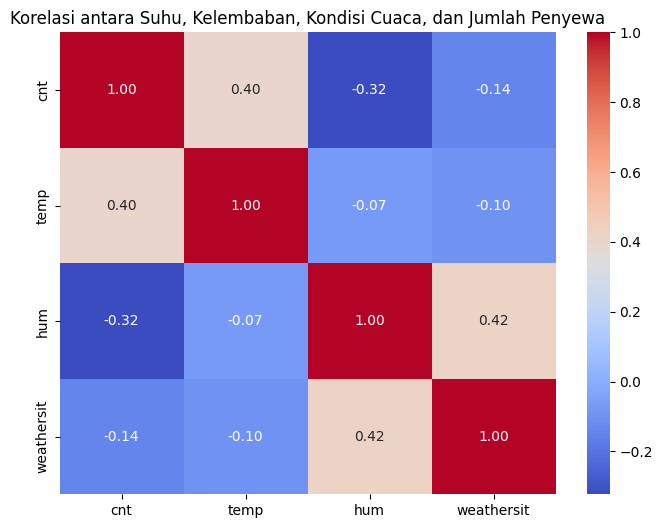

In [36]:
# Berdasarkan data Hari
# Menghitung korelasi antara total perental dengan suhu, kelembapan, dan kondisi cuaca
correlation_matrix = df1[['cnt', 'temp', 'hum', 'weathersit']].corr()

# Visualisasi korelasi menggunakan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasi antara Suhu, Kelembaban, Kondisi Cuaca, dan Jumlah Penyewa")
plt.show()

**Insight:**
- **Aggregasi Data**
  - Aktivitas tertinggi terjadi pada musim 2 (Gugur) dengan total peminjaman lebih dari 1 juta.
  - Semakin tinggi suhu (temp), semakin banyak peminjaman sepeda.
  - Aktivitas tertinggi terjadi pada kondisi 0 (Clear/Partly Cloudy) dengan total peminjaman 2.25 juta lebih.
  - Aktivitas tertinggi adalah waktu saat orang-orang bekerja/bersekolah
  - Aktivitas terendah umumnya terjadi di malam hari (Jam 0 - 5).

- **Korelasi Data**
  - Dari dua heatmap di atas, hubungan antarkolom yang bernilai negatif memiliki korelasi yang lemah.
  - Hubungan antarkolom yang bernilai positif memiliki korelasi yang kuat.

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana pengaruh suhu, kelembaban, dan kondisi cuaca terhadap jumlah penyewa harian?

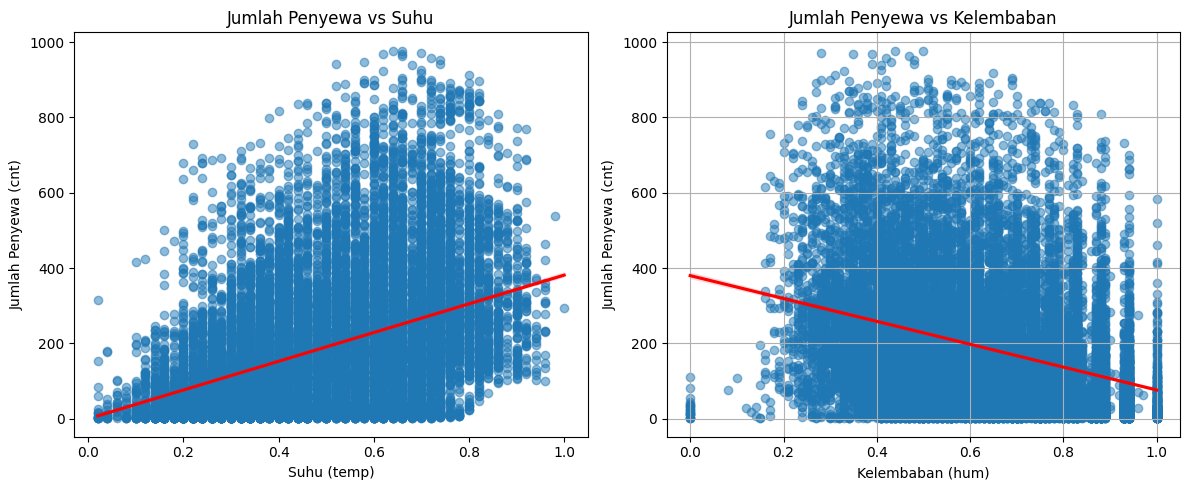

In [37]:
# Menyiapkan figure dengan 2 subplot dalam satu baris
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Scatter plot dengan regresi untuk penyewa terhadap temp
sns.regplot(x='temp', y='cnt', data=df1, ax=axes[0], scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
axes[0].set_title("Jumlah Penyewa vs Suhu")
axes[0].set_xlabel("Suhu (temp)")
axes[0].set_ylabel("Jumlah Penyewa (cnt)")

# Scatter plot dengan regresi untuk penyewa terhadap hum
sns.regplot(x='hum', y='cnt', data=df1, ax=axes[1], scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
axes[1].set_title("Jumlah Penyewa vs Kelembaban")
axes[1].set_xlabel("Kelembaban (hum)")
axes[1].set_ylabel("Jumlah Penyewa (cnt)")

plt.grid(1)
# Menampilkan plot
plt.tight_layout()
plt.show()

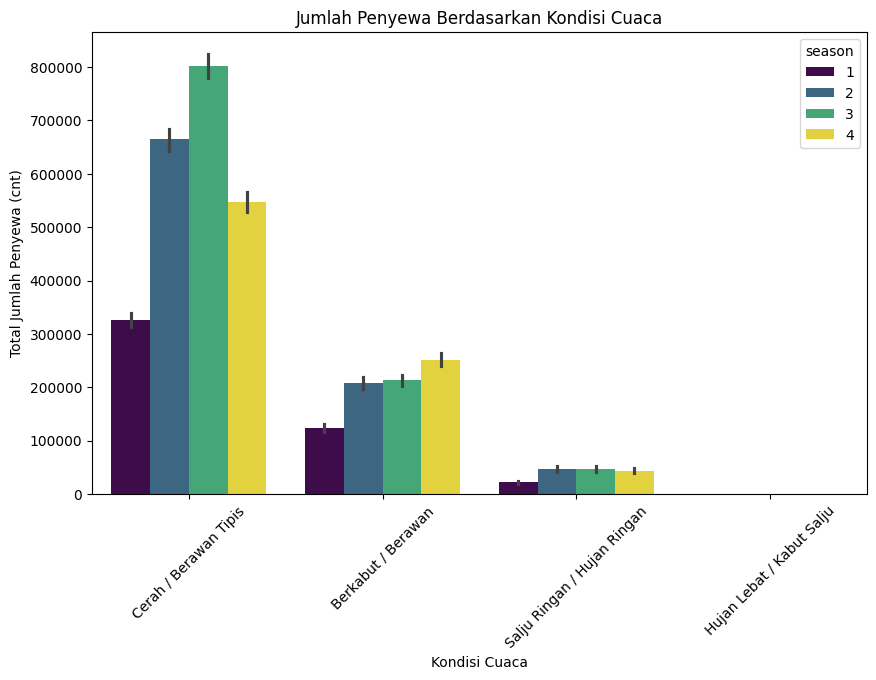

In [38]:
# Membuat bar chart untuk melihat jumlah penyewa berdasarkan kondisi cuaca
plt.figure(figsize=(10, 6))
sns.barplot(x='weather_desc', y='cnt', data=df1, estimator=sum, hue='season', palette='viridis')
plt.title('Jumlah Penyewa Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Jumlah Penyewa (cnt)')
plt.xticks(rotation=45)
plt.show()


### Pertanyaan 2:Bagaimana pola jumlah penyewa berubah sepanjang hari, dan faktor apa yang mungkin memengaruhi peningkatan atau penurunan jumlah penyewa pada jam-jam tertentu?

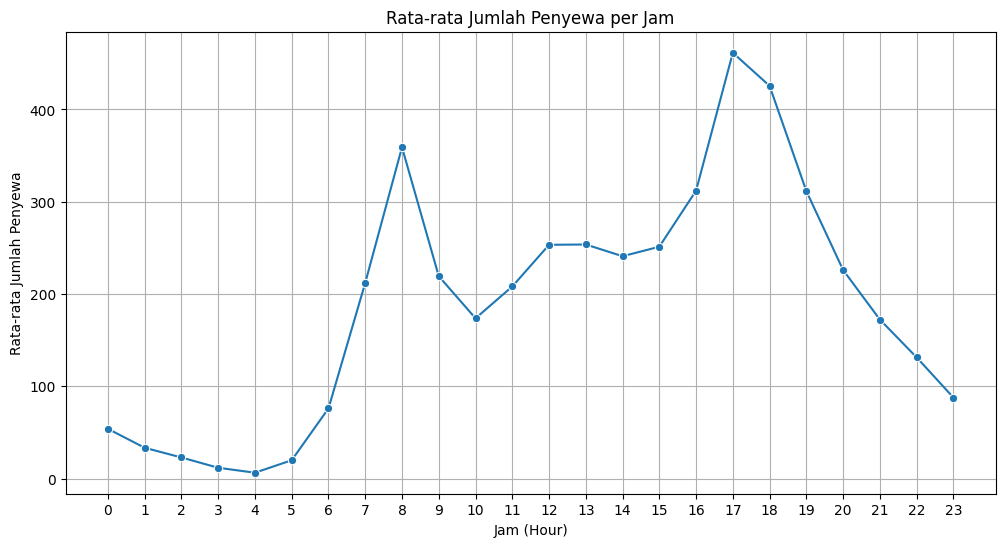

In [39]:
# Menghitung rata-rata jumlah penyewa pe jam
avg_rental_per_hour = df1.groupby('hr')['cnt'].mean()

# Plot rata-rata jumlah penyewa per jam
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rental_per_hour.index, y=avg_rental_per_hour.values, marker='o')
plt.xlabel('Jam (Hour)')
plt.ylabel('Rata-rata Jumlah Penyewa')
plt.title('Rata-rata Jumlah Penyewa per Jam')
plt.xticks(range(0, 24))
plt.grid(1)
plt.show()

## Conclusion

- **Conclution pertanyaan 1**

  Dari visualisasi scatter plot, terlihat bahwa korelasi antara penyewa dan kondisi suhu adalah jika kondisi suhu tinggi (> 0.5) maka jumlah penyewa meningkat. Korelasi antara penyewa dan kondisi kelembapan adalah jika kelembapan tinggi maka jumlah penyewa cenderung menurun. Hubungan antara penyewa dan kondisi cuaca adalah jika kondisi cuaca buruk maka akan mengurangi penyewaan, penyewa tertinggi juga di dapat pada saat kondisi cuaca cerah/berawan tipis di musim gugur.

- **Conclution pertanyaan 2**

  Dari visualisasi line chart, terlihat bahwa pola jumlah penyewa berubah sepanjang hari dengan peningkatan signifikan pada jam-jam tertentu. Khususnya, jumlah penyewa cenderung meningkat pada pagi hari (sekitar jam 7-9) dan sore hari (sekitar jam 16-19). Peningkatan ini kemungkinan disebabkan oleh banyaknya orang yang berpergian untuk kuliah atau bekerja pada jam-jam tersebut. Sebaliknya, jumlah penyewaan cenderung rendah pada malam hari hingga dini hari, yang menunjukkan minimnya aktivitas di luar ruangan karena waktu istirahat setelah beraktivitas.